# What do Anonymous Communities Talk About?

The age of identity-driven social media is here. What happens when you strip identity?

# Confesh
<img style="float: left;" src="http://photos2.meetupstatic.com/photos/event/5/8/9/9/600_443542681.jpeg">

### Honest Thoughts, Private Communities

In [145]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import functools

from os import path
from scipy.ndimage import imread
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython.display import display

plt.style.use('ggplot')
%matplotlib inline

In [83]:
holyc_df = pd.read_csv('../tmp/clean/holyokecon_confessional_comments.csv')
holyr_df = pd.read_csv('../tmp/clean/holyokecon_confessional_reports.csv')
holys_df = pd.read_csv('../tmp/clean/holyokecon_confessional_secrets.csv')
smithc_df = pd.read_csv('../tmp/clean/smithcon_confessional_comments.csv')
smithr_df = pd.read_csv('../tmp/clean/smithcon_confessional_reports.csv')
smiths_df = pd.read_csv('../tmp/clean/smithcon_confessional_secrets.csv')

In [187]:
def add_college_name(df, name):
    df_mod = df.copy()
    df_mod['college_name'] = name
    return df_mod

smiths_df = add_college_name(smiths_df, 'Smith')
holys_df = add_college_name(holys_df, 'Holyoke')
secrets = pd.concat([smiths_df, holys_df])

## Obligatory Word Cloud

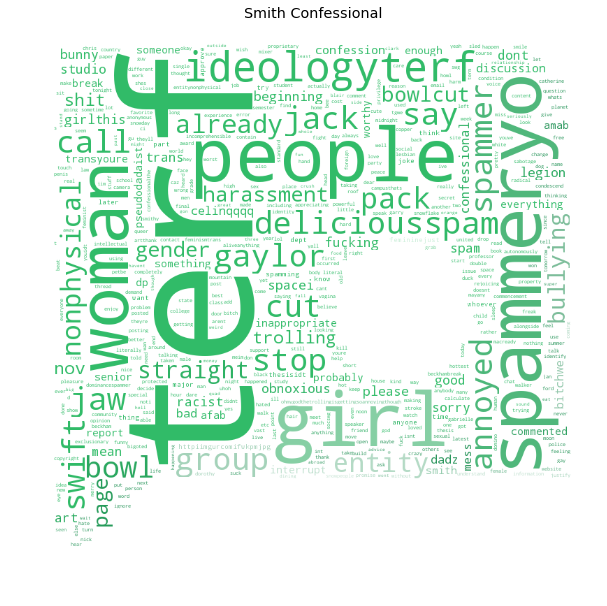

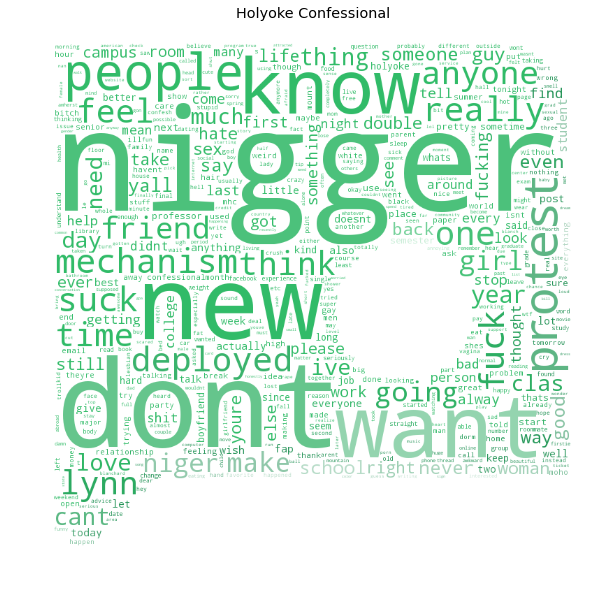

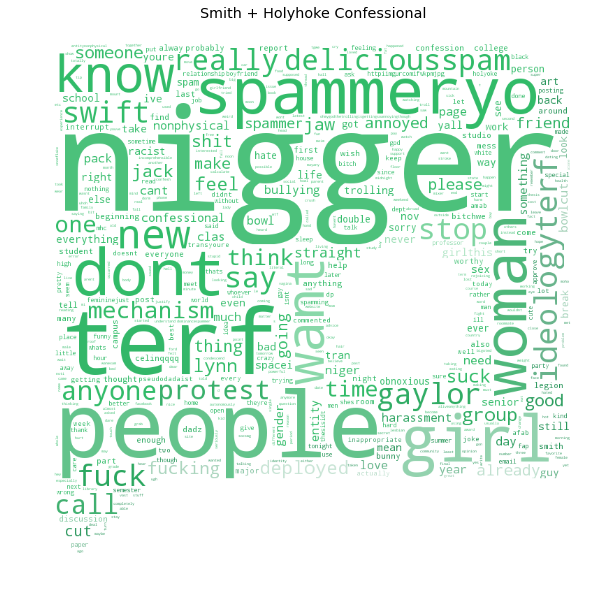

In [206]:
word_cloud_options = {
    'width': 800, 
    'height': 800,
    'background_color': "white", 
    'max_words': 500, 
    'stopwords': STOPWORDS,
    'random_state': 42   
}

def create_word_cloud(text_iterable, image_color_fp=None,
                      title='', **kwargs):
    confesh_coloring = imread(image_color_fp)
    kwargs.update({'mask': confesh_coloring})
    wc = WordCloud(**kwargs)
    text = " ".join(text_iterable)
    wc.generate(text)

    image_colors = ImageColorGenerator(confesh_coloring)

    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.imshow(wc.recolor(color_func=image_colors))
    plt.axis("off")
    plt.show()
    
logo_fp = '../assets/logo2.png'
create_word_cloud(smiths_df['clean_tokens'].astype(str),
                  logo_fp, title="Smith Confessional",
                  **word_cloud_options)

create_word_cloud(holys_df['clean_tokens'].astype(str),
                  logo_fp, title="Holyoke Confessional",
                  **word_cloud_options)

create_word_cloud(secrets['clean_tokens'].astype(str),
                  logo_fp, title="Smith + Holyhoke Confessional",
                  **word_cloud_options)

In [3]:
def word_counter(text, n=0, length_thres=50):
    t = text.split()
    t = [tk for tk in t if len(tk) < length_thres]
    if n > 0:
        for i in range(n):
            t_ngrams = [" ".join(b) for b in list(ngrams(t, i + 1))]
            t.extend(t_ngrams)
    return Counter(t)

def word_aggregater(corpus_list, n=0):
    c = Counter()
    for doc in corpus_list:
        c.update(word_counter(doc, n=n))
    return c

In [4]:
corpus = smithc_df['clean_tokens'][smithc_df['clean_tokens'].notnull()]
token_counts = word_aggregater(corpus, n=3).items()
token_df = pd.DataFrame(token_counts)
token_df.columns = ['word', 'frequency']

# filter
token_df = token_df[token_df['frequency'] > 5]

# sort
token_df = token_df.sort_values('frequency', ascending=True)

# compute grams
token_df['ngrams'] = token_df['word'].apply(lambda x: len(x.split()))

# reset index
token_df.reset_index(inplace=True, drop=True)
token_df.head()

,word,frequency,ngrams
0,crazy gender,6,2
1,block help,6,2
2,aquiline aquiver,6,2
3,one ever find,6,3
4,speak proper,6,2


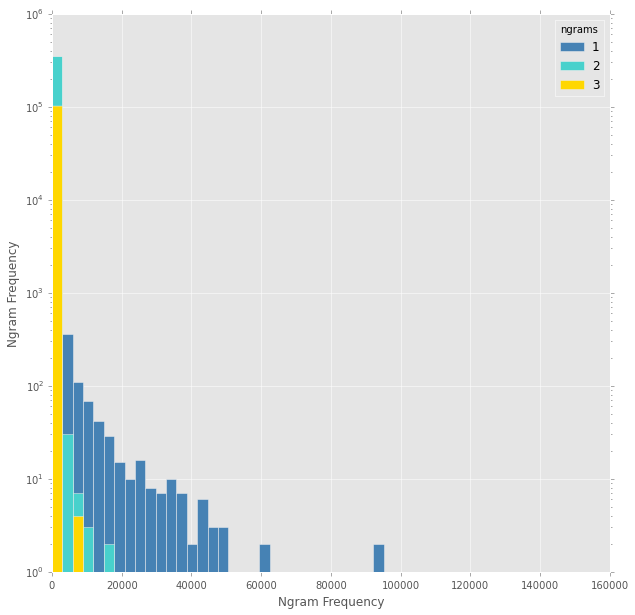

In [5]:
colors = [
    'steelblue', 
    'mediumturquoise',
    'gold'
]

plot_options = {
    'kind': 'hist',
    'logy': True,
    'bins': 50,
    'figsize': (10,10),
    'color': colors
}
wide_df = token_df.ix[:, ['frequency', 'ngrams']]
wide_df = wide_df.pivot(columns = 'ngrams', values='frequency')
ax = wide_df[[1, 2, 3]].plot(**plot_options)
ax.set_xlabel('Ngram Frequency')
ax.set_ylabel('Ngram Frequency');

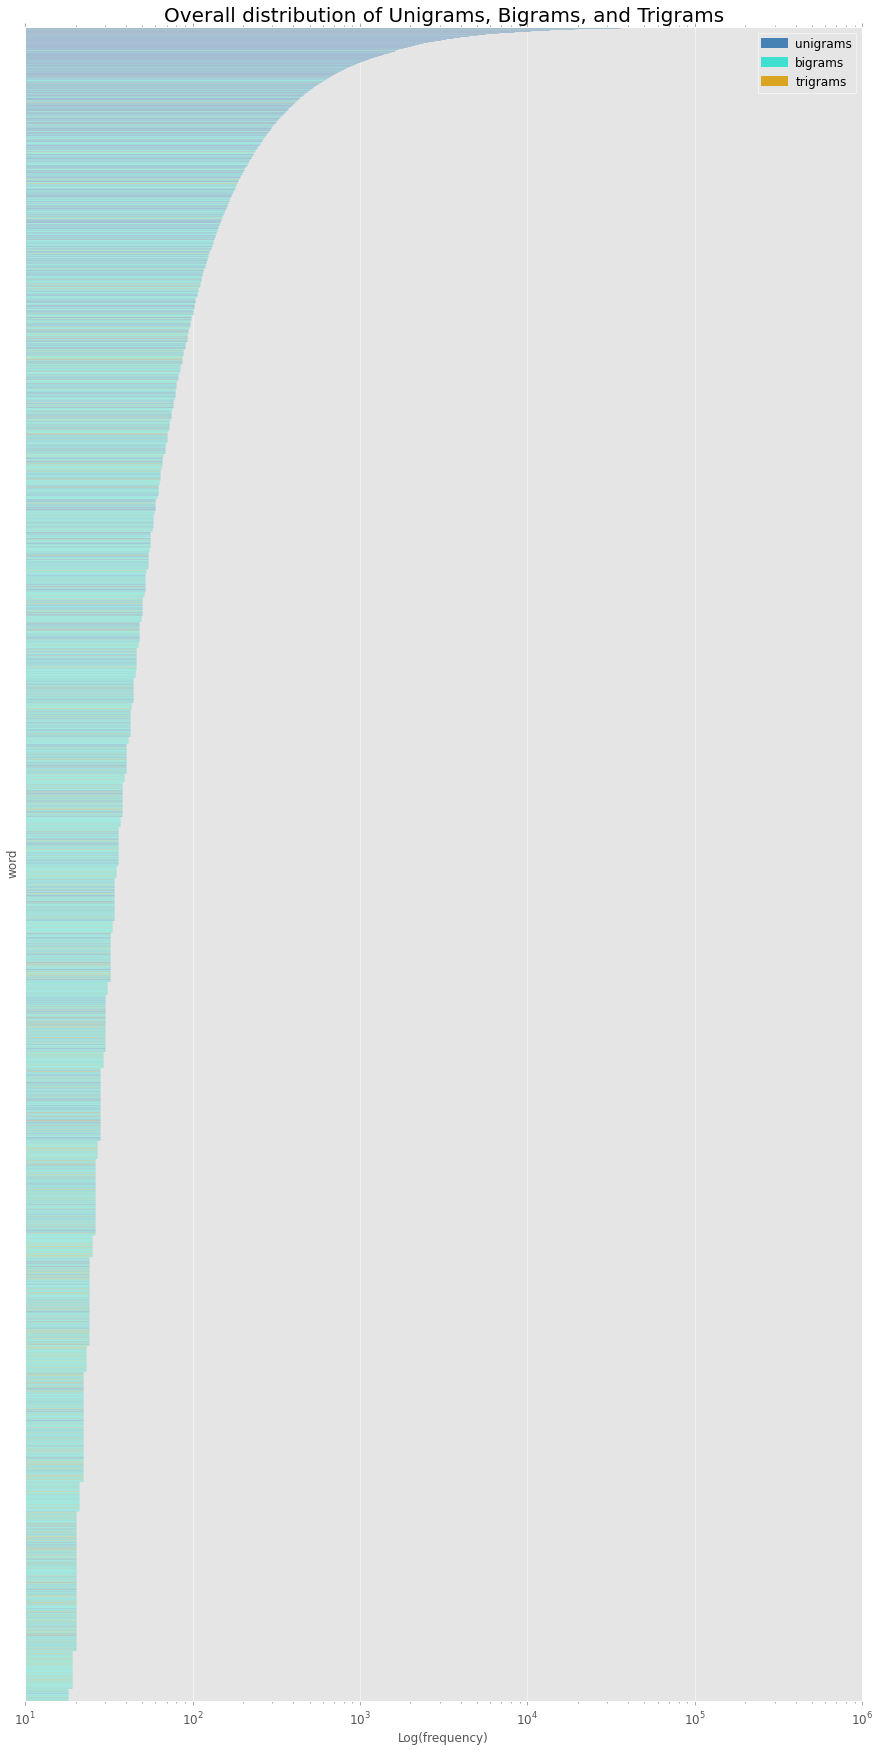

In [25]:
plot_options = {
    'x': 'word',
    'y': 'frequency',
    'kind': 'barh',
    'figsize': (15,30),
    'stacked': True,
    'width': 8,
    'fontsize': 12,
    'yticks': [],
    'logx': True,
    'legend': False,
    'alpha': 0.25
}

uni_bi_tri_gram = token_df[token_df['ngrams'] <= 3]
ubt_gram_tail = uni_bi_tri_gram.tail(100000)
colors = {1: 'steelblue', 2: 'turquoise', 3: 'goldenrod'}
ax = ubt_gram_tail.plot(color=[colors[i] for i in ubt_gram_tail['ngrams']], **plot_options);

ax.set_xlabel("Log(frequency)")
ax.set_title('Overall distribution of Unigrams, Bigrams, and Trigrams', fontsize=20)
uni_artist = plt.Line2D((0,1),(0,0), color=colors[1], linestyle='-', linewidth=10.0)
bi_artist = plt.Line2D((0,1),(0,0), color=colors[2], linestyle='-', linewidth=10.0)
tri_artist = plt.Line2D((0,1),(0,0), color=colors[3], linestyle='-', linewidth=10.0)

#Create legend from custom artist/label lists
ax.legend([uni_artist, bi_artist, tri_artist],
          ['unigrams', 'bigrams', 'trigrams']);

In [27]:
unigrams = token_df[token_df['ngrams'] == 1]
bigrams = token_df[token_df['ngrams'] == 2]
trigrams = token_df[token_df['ngrams'] == 3]

In [28]:
unigrams.tail()

,word,frequency,ngrams
528154,think,93120,1
528155,get,104294,1
528156,people,129876,1
528157,like,145638,1
528158,dont,148672,1


In [29]:
bigrams.tail()

,word,frequency,ngrams
527996,dont think,13298,2
528024,dont know,15575,2
528031,nigger nigger,16006,2
528061,fap fap,19197,2
528129,rmoney rmoney,37999,2


In [30]:
trigrams.tail()

,word,frequency,ngrams
527834,post post post,6964,3
527916,fuck fuck fuck,9488,3
528029,nigger nigger nigger,15924,3
528060,fap fap fap,19142,3
528128,rmoney rmoney rmoney,37994,3


In [111]:
plot_options = {
    'x': 'word',
    'y': 'frequency',
    'kind': 'barh',
    'subplots': True, 
    'stacked': True,
    'legend': False,
    'fontsize': 12,
}

def plot_ngrams(df, plot_options, **kwargs):
    plot_options.update(kwargs)
    plot = df.plot(**plot_options)[0]
    plot.set_xlabel("frequency")
    plot.set_ylabel("")
    
def percentile_plot_ngrams(ngram_df, fixed_plot_options, main_title, **var_plot_options):
    ptile_25 = int(ngram_df.shape[0] / 4)
    ptile_50 = ptile_25 * 2
    ptile_75 = ptile_25 * 3

    n = 25
    ngrams_ptile_top = ngram_df.tail(n)
    ngrams_ptile_75 = ngram_df.iloc[ptile_75: ptile_75 + n]
    ngrams_ptile_50 = ngram_df.iloc[ptile_50: ptile_50 + n]
    ngrams_ptile_25 = ngram_df.iloc[ptile_25: ptile_25 + n]
    ngrams_ptile_bottom = ngram_df.head(n)

    fig, axes = plt.subplots(5, 1, figsize=(7, 35))
    plt.subplots_adjust(hspace=0.08)
    plt.suptitle(main_title, y=0.92, fontsize=18)

    fixed_plot_options.update(var_plot_options)
    
    plot_ngrams(ngrams_ptile_top, fixed_plot_options, subplots=True, ax=axes[0])
    plot_ngrams(ngrams_ptile_75, fixed_plot_options, subplots=True, ax=axes[1])
    plot_ngrams(ngrams_ptile_50, fixed_plot_options, subplots=True, ax=axes[2])
    plot_ngrams(ngrams_ptile_25, fixed_plot_options, subplots=True, ax=axes[3])
    plot_ngrams(ngrams_ptile_bottom, fixed_plot_options, subplots=True, ax=axes[4])
    
    def format_axes(ax, title):
        title_options = {
            'x': -0.18,
            'y': 1.01
        }
        ax.set_title(title, **title_options)
        ax.xaxis.tick_top()
        ax.set_xlabel("")
        return ax
    
    format_axes(axes[0], "Top %s Tokens" % n)
    format_axes(axes[1], "75 percentile")
    format_axes(axes[2], "50 percentile")
    format_axes(axes[3], "25 percentile")
    format_axes(axes[4], "Bottom %s Tokens" % n)

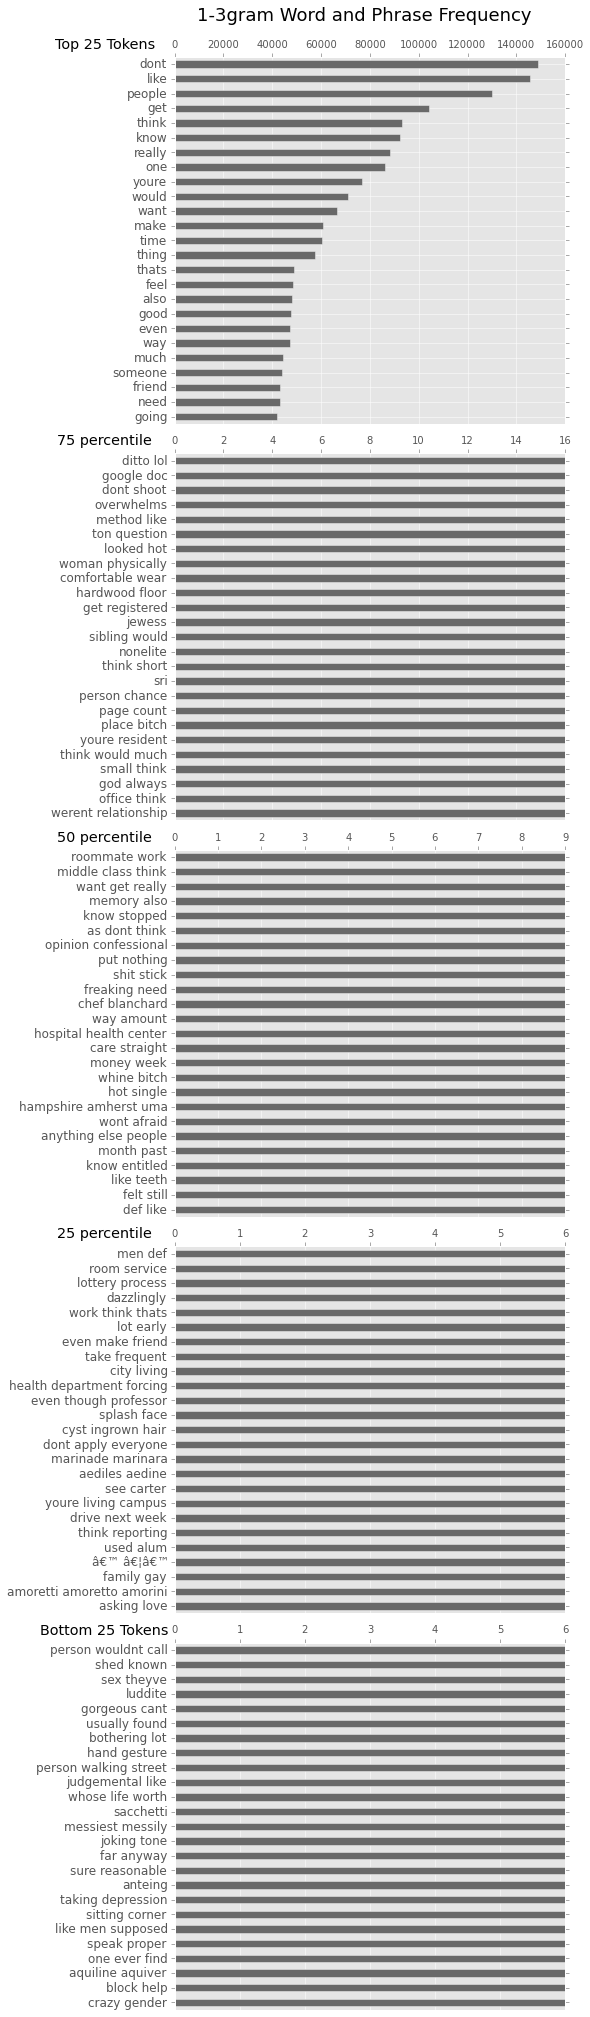

In [112]:
percentile_plot_ngrams(uni_bi_tri_gram, plot_options, 
                       "1-3gram Word and Phrase Frequency",
                       color='dimgrey')

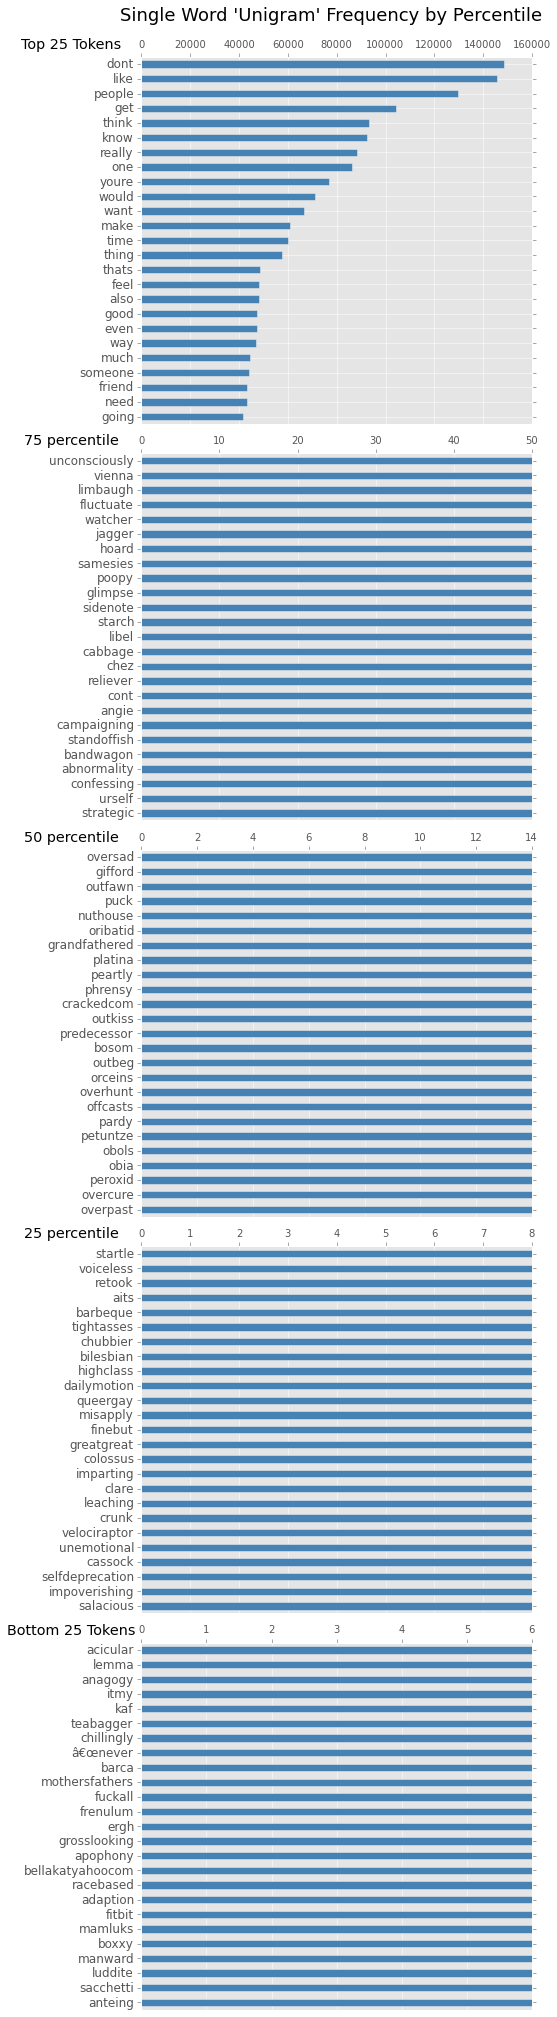

In [113]:
percentile_plot_ngrams(unigrams, plot_options, 
                       "Single Word 'Unigram' Frequency by Percentile", 
                       color='steelblue')

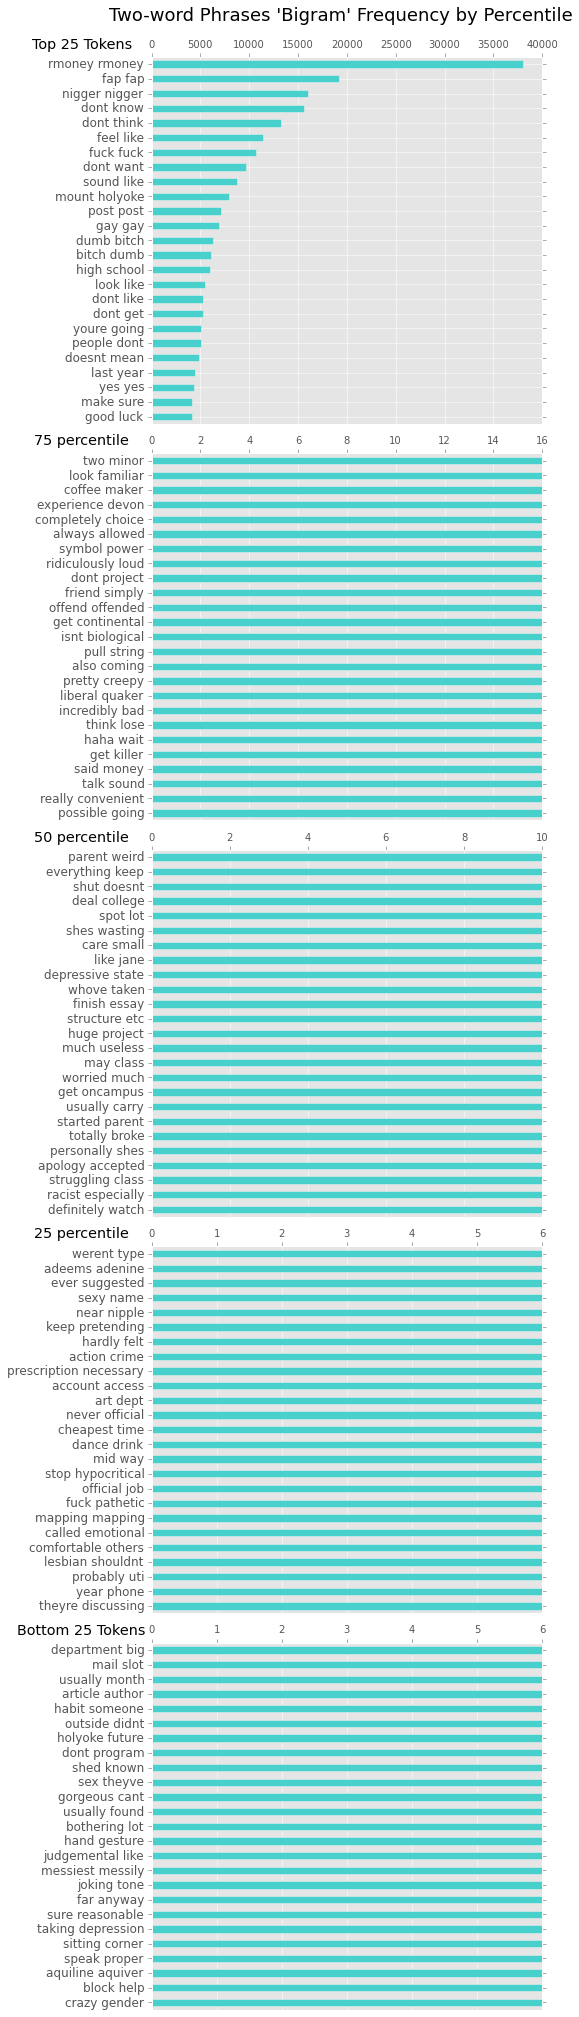

In [115]:
percentile_plot_ngrams(bigrams, plot_options, 
                       "Two-word Phrases 'Bigram' Frequency by Percentile",
                       color='mediumturquoise')

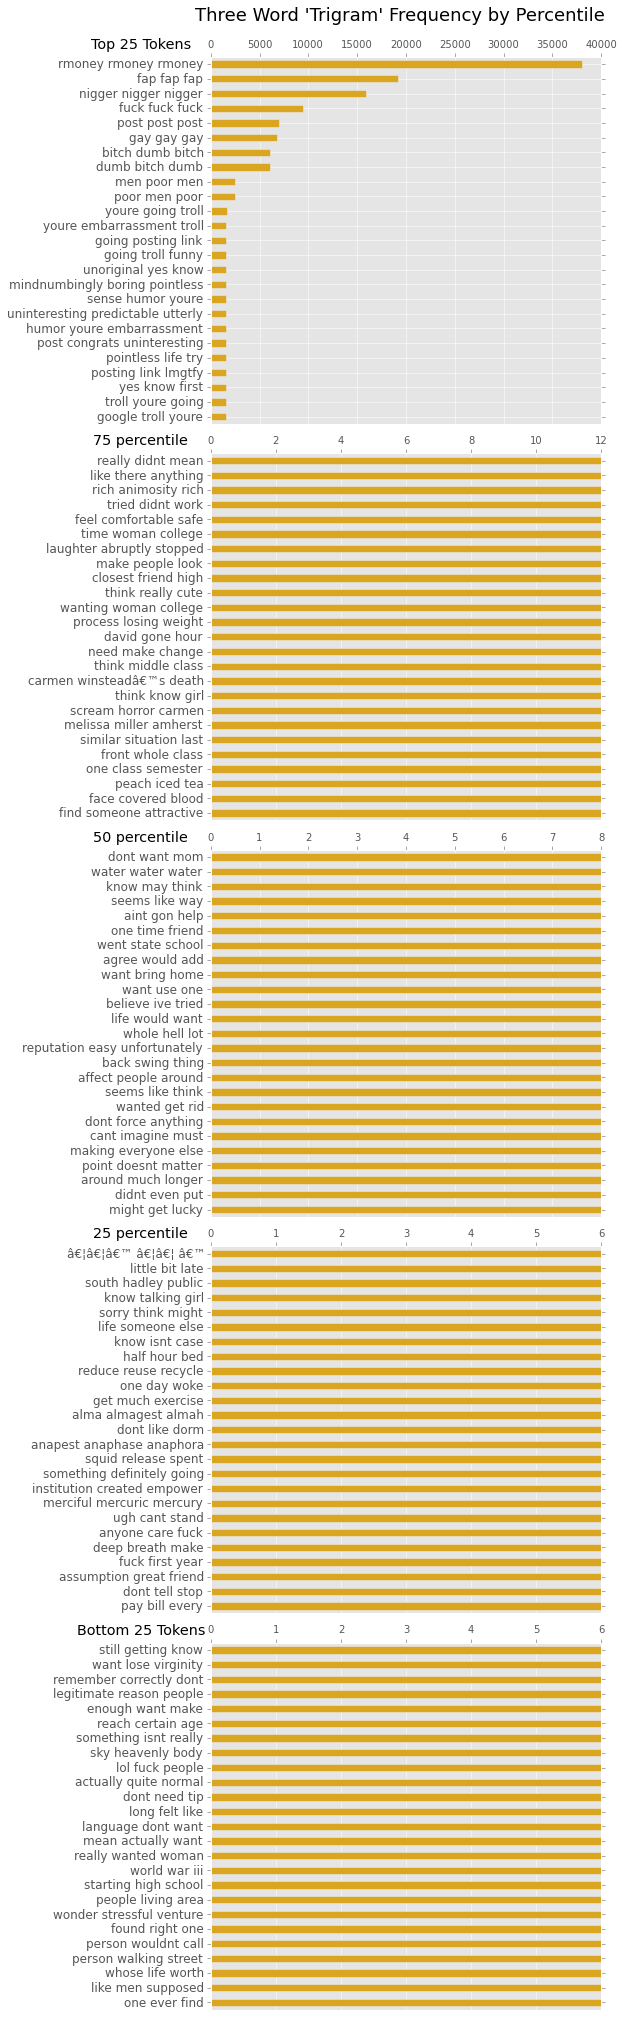

In [116]:
percentile_plot_ngrams(trigrams, plot_options, 
                       "Three Word 'Trigram' Frequency by Percentile",
                       color='goldenrod')